In [88]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt
from matplotlib.patches import ConnectionPatch

In [2]:
df = gpd.read_file("BF_10_03_2020.zip")

In [3]:
df2 = gpd.read_file("BF_08_02_2020.zip")

In [4]:
df2.head()

,mvt_id,DN,geometry
0,None,4.0,"POLYGON ((-12386072.825 3999537.731, -12386072..."
1,None,4.0,"POLYGON ((-12386070.156 3999538.766, -12386070..."
2,None,4.0,"POLYGON ((-12386067.954 3999531.946, -12386067..."
3,None,4.0,"POLYGON ((-12386071.341 3999548.349, -12386071..."
4,None,4.0,"POLYGON ((-12386070.595 3999548.302, -12386070..."


# For df1 (Oct 2020) 

In [5]:
df["area"] = df.area

In [6]:
df['centroid'] = df.centroid
df['centroid']

0       POINT (-12386059.874 3999557.488)
1       POINT (-12386059.123 3999554.551)
2       POINT (-12386059.490 3999554.273)
3       POINT (-12386058.413 3999557.855)
4       POINT (-12386057.928 3999557.859)
                      ...                
7360    POINT (-12385927.687 3999598.412)
7361    POINT (-12385920.748 3999494.777)
7362    POINT (-12385922.418 3999593.478)
7363    POINT (-12385922.833 3999591.188)
7364    POINT (-12385921.579 3999589.459)
Name: centroid, Length: 7365, dtype: geometry

In [ ]:
plt.figure(figsize=(16, 8))
df["area"].plot(kind='hist', bins = 100)

In [ ]:
# plt.figure(figsize=(16, 16))
df.plot("area", legend=True, figsize=(16, 16))

In [ ]:
# plt.figure(figsize=(16, 16))
df = df.set_geometry("centroid")
df.plot("area", legend=True, figsize=(16, 16))

In [8]:
df = df.set_geometry("geometry")

# For df2 (Aug 2020)

In [7]:
df2["area"] = df2.area

In [8]:
df2['centroid'] = df2.centroid
df2['centroid']

0       POINT (-12386072.636 3999537.542)
1       POINT (-12386070.184 3999538.509)
2       POINT (-12386068.133 3999531.497)
3       POINT (-12386071.411 3999548.372)
4       POINT (-12386070.759 3999548.336)
                      ...                
3666    POINT (-12385914.798 3999616.488)
3667    POINT (-12385914.654 3999615.601)
3668    POINT (-12385912.517 3999528.752)
3669    POINT (-12385912.519 3999539.630)
3670    POINT (-12385913.220 3999609.211)
Name: centroid, Length: 3671, dtype: geometry

In [ ]:
plt.figure(figsize=(16, 8))
df2["area"].plot(kind='hist', bins = 100)

In [ ]:
df2.plot("area", legend=True, figsize=(16, 16))

## Calculating Ecc

In [9]:
## Get Eccentricity 

import numpy as np
from scipy.spatial.distance import euclidean

def get_ecc(area_polygon):
    points = np.array(area_polygon)

    small_latwise = np.min(points[points[:, 0] == np.min(points[:, 0])], 0)
    small_lonwise = np.min(points[points[:, 1] == np.min(points[:, 1])], 0)
    big_latwise = np.max(points[points[:, 0] == np.max(points[:, 0])], 0)
    big_lonwise = np.max(points[points[:, 1] == np.max(points[:, 1])], 0)
    distance_lat = euclidean(big_latwise, small_latwise)
    distance_lon = euclidean(big_lonwise, small_lonwise)
    if distance_lat >= distance_lon:
        major_axis_length = distance_lat
        minor_axis_length = distance_lon
    else:
        major_axis_length = distance_lon
        minor_axis_length = distance_lat
    a = major_axis_length/2
    b = minor_axis_length/2
    ecc = np.sqrt(np.square(a)-np.square(b))/a
    return ecc

In [ ]:
df['ecc'] = None

for j in range(len(df)):
    try:
        area_polygon = [[i[1],i[0]] for i in list(df['geometry'][j].exterior.coords)]
    except:
        area_polygon = [[i[1],i[0]]  for poly in list(df['geometry'][j]) for i in list(poly.exterior.coords) ]
    df['ecc'][j] = get_ecc(area_polygon)

In [ ]:
df2['ecc'] = None

for j in range(len(df2)):
    #print(j)
    try:
        area_polygon = [[i[1],i[0]] for i in list(df2['geometry'][j].exterior.coords)]
    except:
        area_polygon = [[i[1],i[0]]  for poly in list(df2['geometry'][j]) for i in list(poly.exterior.coords)]
            
    df2['ecc'][j] = get_ecc(area_polygon)

## Perimeter of Polygons

In [12]:
df["perimeter"] = df["geometry"].length

In [13]:
df2["perimeter"] = df2["geometry"].length

<AxesSubplot:ylabel='Frequency'>

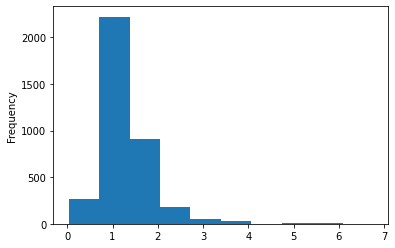

In [14]:
df2['perimeter'].plot(kind='hist')

## Compactness

In [15]:
def pp_compactness(geom): # Polsby-Popper
    p = geom.length
    a = geom.area    
    return (4*pi*a)/(p*p)

In [16]:
df["compactness"] = df.geometry.apply(pp_compactness)
df2["compactness"] = df2.geometry.apply(pp_compactness)

<AxesSubplot:ylabel='Frequency'>

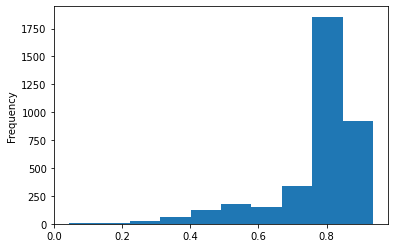

In [17]:
df2['compactness'].plot(kind='hist')

## Convexity

In [18]:
def convexity(geom): # Polsby-Popper
    p = geom.convex_hull.length
    a = geom.length    
    return (p/a)

In [19]:
df["convexity"] = df.geometry.apply(convexity)

In [20]:
df2["convexity"] = df2.geometry.apply(convexity)

<AxesSubplot:ylabel='Frequency'>

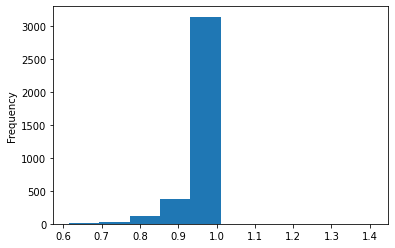

In [21]:
df2["convexity"].plot(kind='hist')

## Solidity

In [22]:
def solidity(geom): # Polsby-Popper
    convex_area = geom.convex_hull.area
    area = geom.area    
    return (area/convex_area)

In [23]:
df["solidity"] = df.geometry.apply(solidity)

In [24]:
df2["solidity"] = df.geometry.apply(solidity)

<AxesSubplot:ylabel='Frequency'>

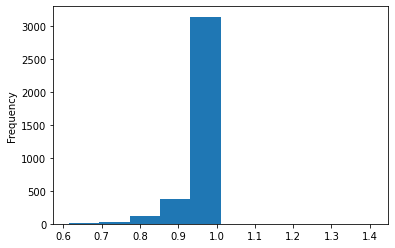

In [25]:
df2["convexity"].plot(kind='hist')

## Angle of Longest Segment of Min Rotated Rectangel 

In [129]:
def getAngle(geom):
    g = geom
    a = g.minimum_rotated_rectangle
    l = a.boundary
    coords = [c for c in l.coords]
    segments = [geometry.LineString([a, b]) for a, b in zip(coords,coords[1:])]
    longest_segment = max(segments, key=lambda x: x.length)

    p1, p2 = [c for c in longest_segment.coords]
    angle = math.degrees(math.atan2(p2[1]-p1[1], p2[0]-p1[0]))
    
    return angle

In [130]:
df = df.set_geometry('geometry')
df["angle"] = df.geometry.apply(getAngle)

In [133]:
df2 = df2.set_geometry('geometry')
df2["angle"] = df2.geometry.apply(getAngle)

<AxesSubplot:ylabel='Frequency'>

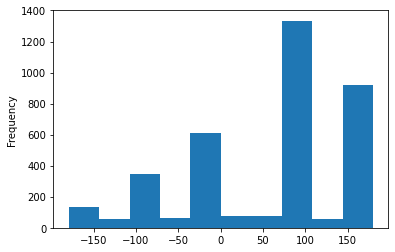

In [138]:
df2["angle"].plot(kind='hist')

## Vectorization 

In [139]:
df.columns

Index(['mvt_id', 'DN', 'geometry', 'area', 'centroid', 'ecc', 'perimeter',
       'compactness', 'convexity', 'solidity', 'feature_vec',
       'nearest_matching_polygon', 'min_ts_ss', 'matching_centroid', 'line',
       'nearest_matching_polygon_Euclidean', 'min_Euclidean',
       'matching_centroid_Euclidean', 'line_Euclidean', 'neighbor_polygon',
       'neighbor_polygon_area', 'neighbor_polygon_centroid',
       'neighbor_polygon_ecc', 'neighbor_polygon_perimeter',
       'neighbor_polygon_compactness', 'neighbor_polygon_convexity',
       'neighbor_polygon_solidity', 'neighbor_polygon_feature_vec',
       'nearest_matching_neighbor_polygon', 'neighbor_polygon_min_ts_ss',
       'matching_centroid_neighbor_polygon', 'line_neighbor_polygon', 'angle'],
      dtype='object')

In [140]:
df['feature_vec'] = None

for i in range(len(df)):
    df['feature_vec'][i] = [df["area"][i], df['ecc'][i], df['perimeter'][i], df['compactness'][i], df['convexity'][i], df['solidity'][i], df['angle'][i]]

In [141]:
df2['feature_vec'] = None

for i in range(len(df2)):
    df2['feature_vec'][i] = [df2["area"][i], df2['ecc'][i], df2['perimeter'][i], df2['compactness'][i], df2['convexity'][i], df2['solidity'][i], df2['angle'][i]]

## TS_SS Similarity 

In [142]:
import math

def Cosine(vec1, vec2) :
    result = InnerProduct(vec1,vec2) / (VectorSize(vec1) * VectorSize(vec2))
    return result

def VectorSize(vec) :
    return math.sqrt(sum(math.pow(v,2) for v in vec))

def InnerProduct(vec1, vec2) :
    return sum(v1*v2 for v1,v2 in zip(vec1,vec2))

def Euclidean(vec1, vec2) :
    return math.sqrt(sum(math.pow((v1-v2),2) for v1,v2 in zip(vec1, vec2)))

def Theta(vec1, vec2) :
    return math.acos(Cosine(vec1,vec2)) + math.radians(10)

def Triangle(vec1, vec2) :
    theta = math.radians(Theta(vec1,vec2))
    return (VectorSize(vec1) * VectorSize(vec2) * math.sin(theta)) / 2

def Magnitude_Difference(vec1, vec2) :
    return abs(VectorSize(vec1) - VectorSize(vec2))

def Sector(vec1, vec2) :
    ED = Euclidean(vec1, vec2)
    MD = Magnitude_Difference(vec1, vec2)
    theta = Theta(vec1, vec2)
    return math.pi * math.pow((ED+MD),2) * theta/360

def TS_SS(vec1, vec2) :
    return Triangle(vec1, vec2) * Sector(vec1, vec2)

vec1 = [1,2]
vec2 = [2,4]

print(Euclidean(vec1,vec2))
print(Cosine(vec1,vec2))
print(TS_SS(vec1,vec2))

2.23606797749979
0.9999999999999998
0.0004639582566999478


## Individual Rock Matching based on feature_vec with TS_SS Distance

In [143]:
df['nearest_matching_polygon'] = None
df['min_ts_ss'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        curr_ts_ss = TS_SS(df['feature_vec'][i], df2['feature_vec'][j])
        
        if df['min_ts_ss'][i] > curr_ts_ss:
            
            df['min_ts_ss'][i] = curr_ts_ss
            df['nearest_matching_polygon'][i] = j

## Individual Rock Matching based on feature_vec with Euclidean Distance 

In [ ]:
df['nearest_matching_polygon_Euclidean'] = None
df['min_Euclidean'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        curr_dist = Euclidean(df['feature_vec'][i], df2['feature_vec'][j])
        
        if df['min_Euclidean'][i] > curr_dist:
            
            df['min_Euclidean'][i] = curr_dist
            df['nearest_matching_polygon_Euclidean'][i] = j

<AxesSubplot:ylabel='Frequency'>

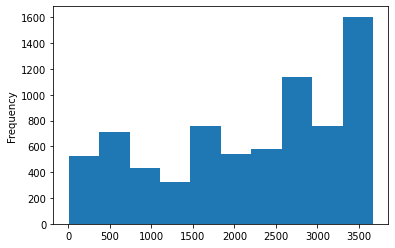

In [57]:
df['nearest_matching_polygon_Euclidean'].plot(kind='hist')

## Visualization

In [146]:
def get_centroid_and_line(name, df):
    
    df['matching_centroid'] = None
    
    for i in range(len(df)):
        df['matching_centroid'][i] = df2['centroid'][df['nearest_matching_polygon'][i]]
    
    df['line'] = df.apply(lambda x: LineString([x['centroid'], x['matching_centroid']]), axis=1)
    
    return df 

In [147]:
df = get_centroid_and_line('', df)

In [51]:
df.head()

,mvt_id,DN,geometry,area,centroid,ecc,perimeter,compactness,convexity,solidity,feature_vec,nearest_matching_polygon,min_ts_ss,matching_centroid,line,nearest_matching_polygon_Euclidean,min_Euclidean,matching_centroid_Euclidean,line_Euclidean
0,None,4.0,"POLYGON ((-12386059.874 3999557.689, -12386059...",0.110830,POINT (-12386059.874 3999557.488),0.15098,1.263292,0.872687,0.990184,0.985294,"[0.1108296865834059, 0.1509796180007819, 1.263...",1757,1.260954e-08,POINT (-12386018.341165133 3999600.420887767),LINESTRING (-12386059.874023465 3999557.488317...,1757,0.027541,POINT (-12386018.341165133 3999600.420887767),LINESTRING (-12386059.874023465 3999557.488317...
1,None,4.0,"POLYGON ((-12386059.071 3999554.741, -12386059...",0.080184,POINT (-12386059.123 3999554.551),0.570022,1.116324,0.808568,0.955750,0.947044,"[0.08018392882467013, 0.5700218614816318, 1.11...",2233,1.746286e-08,POINT (-12386005.721814252 3999627.4292108486),LINESTRING (-12386059.122707251 3999554.551036...,2658,0.034141,POINT (-12385983.839206252 3999620.2764589903),LINESTRING (-12386059.122707251 3999554.551036...
2,None,4.0,"POLYGON ((-12386059.538 3999554.349, -12386059...",0.024726,POINT (-12386059.490 3999554.273),0.667377,0.605104,0.848586,1.000000,1.000000,"[0.02472555465567231, 0.6673773262089017, 0.60...",770,3.694478e-08,POINT (-12386040.389931975 3999599.5885835094),LINESTRING (-12386059.490237614 3999554.272786...,770,0.039206,POINT (-12386040.389931975 3999599.5885835094),LINESTRING (-12386059.490237614 3999554.272786...
3,None,4.0,"POLYGON ((-12386058.418 3999557.932, -12386058...",0.016455,POINT (-12386058.413 3999557.855),0.54139,0.505949,0.807766,0.993694,0.976744,"[0.01645468251457335, 0.5413902783682365, 0.50...",3101,7.277063e-08,POINT (-12385963.831667084 3999606.1305890945),LINESTRING (-12386058.412541218 3999557.854510...,3101,0.071124,POINT (-12385963.831667084 3999606.1305890945),LINESTRING (-12386058.412541218 3999557.854510...
4,None,4.0,"POLYGON ((-12386057.896 3999557.932, -12386057...",0.018152,POINT (-12386057.928 3999557.859),0.173785,0.492649,0.939872,1.000000,1.000000,"[0.018152387727323496, 0.17378535599577266, 0....",3377,1.581000e-07,POINT (-12385950.665486898 3999567.4300863277),LINESTRING (-12386057.927524421 3999557.858675...,3377,0.102670,POINT (-12385950.665486898 3999567.4300863277),LINESTRING (-12386057.927524421 3999557.858675...


In [148]:
df_sorted = df.sort_values('min_ts_ss')
df_sorted.reset_index(drop=True, inplace=True)

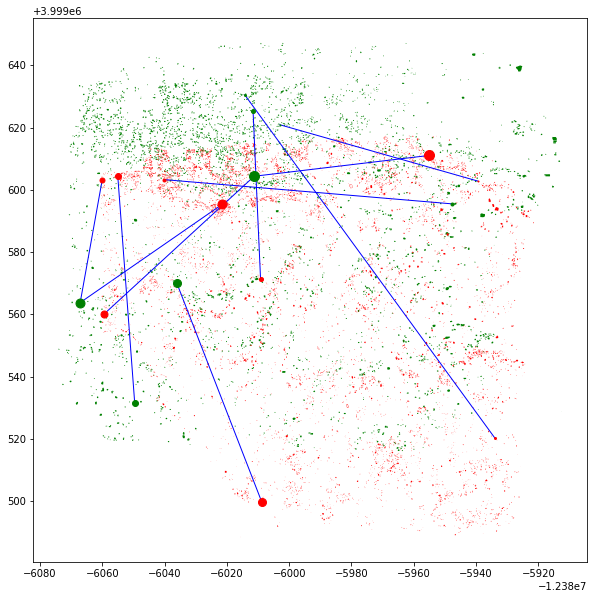

In [151]:
fig, ax = plt.subplots(figsize = (10,10))
fig.patch.set_facecolor('white')


df2.plot(color = 'g', ax=ax, figsize=(10,10))
df.plot(color = 'r', ax=ax , figsize=(10,10))

for i in range(0, 10):
        #i = 10
        xy = [y for y in df_sorted['line'][i].coords]
        #xy = (x[i],y[i])
        con = ConnectionPatch(xyA=xy[1], xyB=xy[0], coordsA="data", coordsB="data",
                              axesA=ax, axesB=ax, color="blue")
        ax.add_artist(con)

        ax.plot(xy[1][0],xy[1][1],'ro',markersize=10-i,color='g')
        ax.plot(xy[0][0],xy[0][1],'ro',markersize=10-i, color='r')

fig.show()

## Experiment with Nearest Neighbor Polygons (Creating a Polygon using the nearest neighbors)

In [112]:
df = df.set_geometry('geometry')
df2 = df2.set_geometry('geometry')

In [113]:
from shapely import geometry

def get_neighborhood_polygon(df, top=5):
    
    df['neighbor_polygon'] = None
    x = df.geometry.apply(lambda g: df.distance(g))
    
    for i in range(len(df)):
        y = x[i].sort_values()[:top]
        df['neighbor_polygon'][i] = geometry.Polygon([[df['centroid'][j].x, df['centroid'][j].y] for j in y.index])
    
    return df

In [114]:
df = get_neighborhood_polygon(df, 10)

In [115]:
df2 = get_neighborhood_polygon(df2, 10)

In [154]:
# neighborhood_

def get_neighbor_polygon_features(df):
    df = df.set_geometry('neighbor_polygon')

    df["neighbor_polygon_area"] = df.area
    df["neighbor_polygon_centroid"] = df.centroid 

    df['neighbor_polygon_ecc'] = None

    for j in range(len(df)):
        try:
            area_polygon = [[i[1],i[0]] for i in list(df['neighbor_polygon'][j].exterior.coords)]
        except:
            area_polygon = [[i[1],i[0]]  for poly in list(df['neighbor_polygon'][j]) for i in list(poly.exterior.coords) ]
        df['neighbor_polygon_ecc'][j] = get_ecc(area_polygon)

    df["neighbor_polygon_perimeter"] = df["neighbor_polygon"].length
    df["neighbor_polygon_compactness"] = df.geometry.apply(pp_compactness)
    df["neighbor_polygon_convexity"] = df.geometry.apply(convexity)
    df["neighbor_polygon_solidity"] = df.geometry.apply(solidity)
    df["neighbor_polygon_angle"] = df.geometry.apply(getAngle)
    return df 

In [155]:
df = get_neighbor_polygon_features(df)
df2 = get_neighbor_polygon_features(df2)

In [156]:
df['neighbor_polygon_feature_vec'] = None

for i in range(len(df)):
    df['neighbor_polygon_feature_vec'][i] = [df["neighbor_polygon_area"][i], df['neighbor_polygon_ecc'][i], df['neighbor_polygon_perimeter'][i], df['neighbor_polygon_compactness'][i], df['neighbor_polygon_convexity'][i], df['neighbor_polygon_solidity'][i], df["neighbor_polygon_angle"][i]]

In [157]:
df2['neighbor_polygon_feature_vec'] = None

for i in range(len(df2)):
    df2['neighbor_polygon_feature_vec'][i] = [df2["neighbor_polygon_area"][i], df2['neighbor_polygon_ecc'][i], df2['neighbor_polygon_perimeter'][i], df2['neighbor_polygon_compactness'][i], df2['neighbor_polygon_convexity'][i], df2['neighbor_polygon_solidity'][i], df2["neighbor_polygon_angle"][i]]

In [160]:
df['nearest_matching_neighbor_polygon'] = None
df['neighbor_polygon_min_ts_ss'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        curr_ts_ss = TS_SS(df['neighbor_polygon_feature_vec'][i], df2['neighbor_polygon_feature_vec'][j])
        
        if df['neighbor_polygon_min_ts_ss'][i] > curr_ts_ss:
            
            df['neighbor_polygon_min_ts_ss'][i] = curr_ts_ss
            df['nearest_matching_neighbor_polygon'][i] = j

In [161]:
def get_centroid_and_line_neighbor_polygon(name, df):
    
    df['matching_centroid_'+name] = None
    
    for i in range(len(df)):
        df['matching_centroid_'+name][i] = df2[name+'_centroid'][df['nearest_matching_'+name][i]]
    
    df['line_'+name] = df.apply(lambda x: LineString([x[name+'_centroid'], x['matching_centroid_'+name]]), axis=1)
    
    return df 

In [162]:
df = get_centroid_and_line_neighbor_polygon('neighbor_polygon', df)

In [163]:
df_sorted = df.sort_values('neighbor_polygon_min_ts_ss')
df_sorted.reset_index(drop=True, inplace=True)

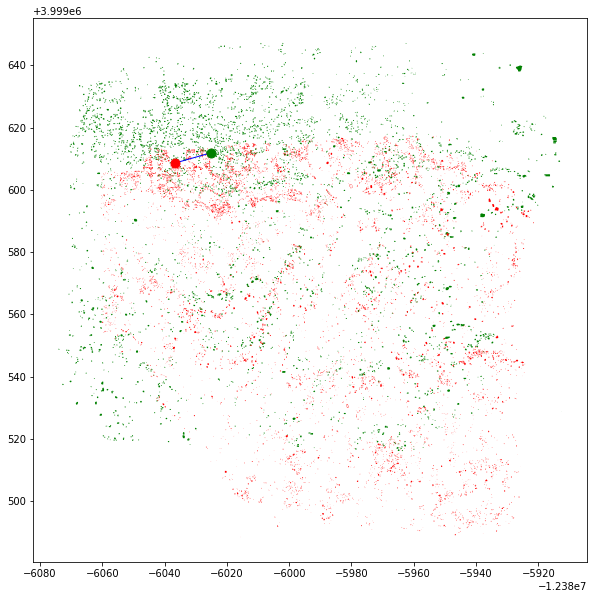

In [168]:
df = df.set_geometry('geometry')
df2 = df2.set_geometry('geometry')

fig, ax = plt.subplots(figsize = (10,10))
fig.patch.set_facecolor('white')


df2.plot(color = 'g', ax=ax, figsize=(10,10))
df.plot(color = 'r', ax=ax , figsize=(10,10))
n = 10
for i in range(1, 2):
        #i = 10
        xy = [y for y in df_sorted['line_neighbor_polygon'][i].coords]
        #xy = (x[i],y[i])
        con = ConnectionPatch(xyA=xy[1], xyB=xy[0], coordsA="data", coordsB="data",
                              axesA=ax, axesB=ax, color="blue")
        ax.add_artist(con)
        ms = n-i
#         ms = 5
        ax.plot(xy[1][0],xy[1][1],'ro',markersize=ms,color='g')
        ax.plot(xy[0][0],xy[0][1],'ro',markersize=ms, color='r')

fig.show()